<h1>Pau Machine Learning : PCA algorithm

Voici le premier épisode de Pau ML, dont le but est d'échanger autour du data science. Pour commencer, nous attaquons une méthode très classique de data mining : l'analyse en composantes principales, ou PCA in english.

In [1]:
%pylab --no-import-all inline
from sklearn.decomposition import PCA
matplotlib.rcParams['figure.figsize'] = 10, 10

Populating the interactive namespace from numpy and matplotlib


<h2>1. Un exemple jouet

[ 0.84358168  0.15641832]


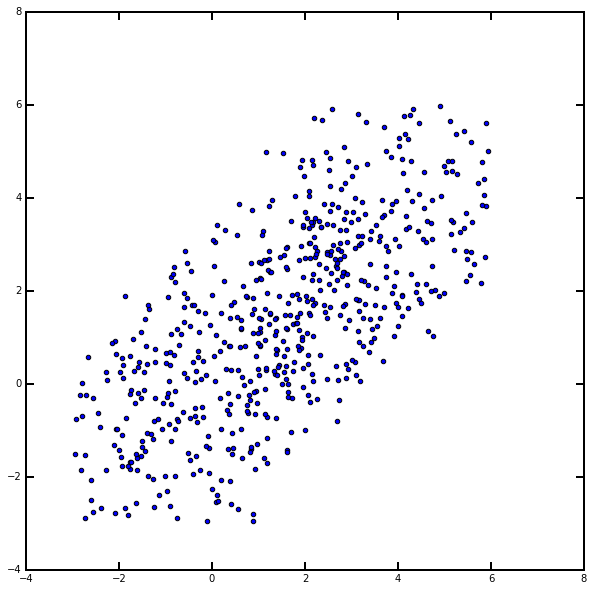

In [2]:
alpha = 4
size = 100
a = np.random.uniform(-1, alpha - 1, (size, 2))
b = np.random.uniform(-2, alpha - 2, (size, 2))
c = np.random.uniform(-3, alpha - 3, (size, 2))
d = np.random.uniform(0, alpha, (size, 2))
e = np.random.uniform(1, 1 + alpha, (size, 2))
f = np.random.uniform(2, 2 + alpha, (size, 2))
X = np.concatenate((a,b,c,d,e,f),axis=0)
pca = PCA(n_components=2)
plt.scatter(X[:,0],X[:,1])
pca.fit(X)
print(pca.explained_variance_ratio_)

La sortie ci-dessus renseigne le pourcentage de variance expliqué par chacun des axes de l'ACP. Ces valeurs sont calculées grâce à la diagonalisation de la matrice ${}^T\!XX$, qui représentent les corrélations entre les colonnes de $X$ (les variables de notre problème d'analyse de données). Chaque coefficient de cette matrice est défini par :
$$
({}^T\!XX)_{ij} = \sum_{k=1}^n X_{ki}X_{kj}, \forall i,j=1, \ldots, p. 
$$
Mathématiquement, l'analyse en composantes principales est un simple changement de représentation (un changement de base): passer d'une représentation canonique (avec la base canonique) à une représentation idéale grâce à la matrice des corrélations (la base des composantes principales). Ci-dessous par exemple voici les nouvelles coordonnées de $X$ dans la nouvelle base :

[[-1.1407521   1.21175499]
 [-1.72795239 -0.81945223]
 [ 0.44470139  1.21012962]
 ..., 
 [ 5.04607816 -0.78317897]
 [ 1.8736126   0.05500443]
 [ 1.12783978  0.03421323]]


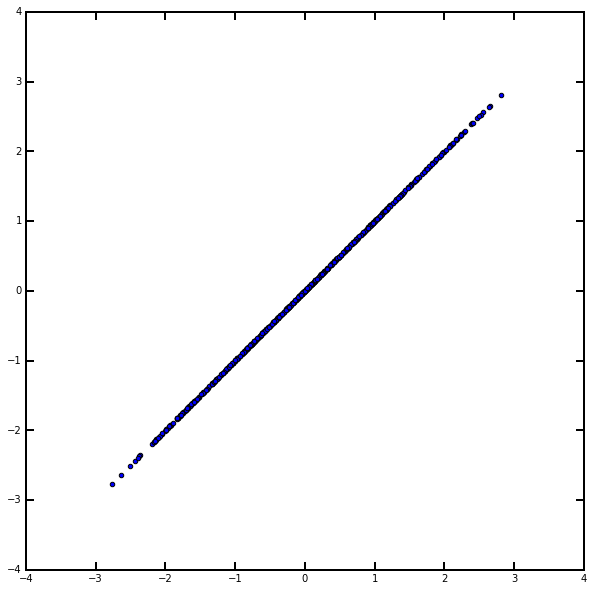

In [3]:
newX = pca.transform(X)
print(newX)
plt.scatter(newX[:,1], newX[:,1])

<H2>2. Exemple digits

L'intérêt de l'analyse en composantes principales est de considérer des données de dimension *plus grande que 2*. Comment représenter des observations ayant un grand nombre de feature ($p=10$, $p=100$ ou $p=10^6$) ? Comment réduire la dimension en tenant compte des corrélations entre les caractères ?  

<H3>2.1 Description de l'échantillon

Grâce au module sklearn, on va étudier un exemple concret : la reconnaissance d'écriture, et plus particulièrement la reconnaissance de chiffres. Dans cet exemple, chaque image représente un chiffre écrit à la main, à faible résolution (8*8 pixels). Nous sommes donc dans le cas où $p=64$.

In [4]:
from sklearn import datasets
#iris = datasets.load_iris()
digits = datasets.load_digits()

Voici par exemple une écriture du chiffre $0$ dans une matrice 8*8 pixels représentant les niveaux de gris de chaque pixel :

In [5]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Voici une série d'images correspondant aux 10 premières observations du dataset digits :

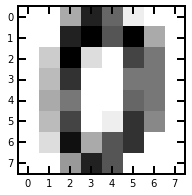

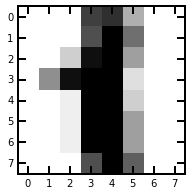

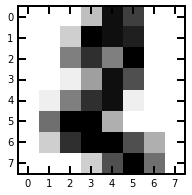

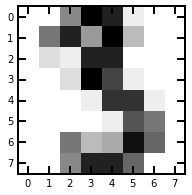

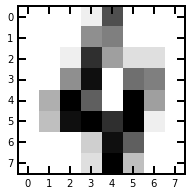

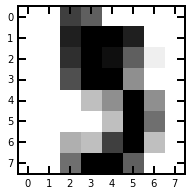

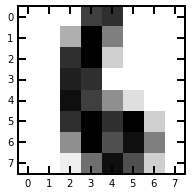

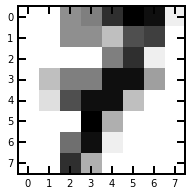

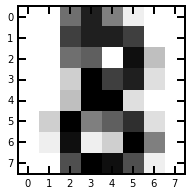

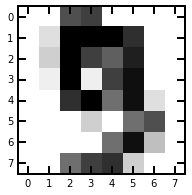

In [6]:
#Load the digits dataset
digits = datasets.load_digits()
#Display the first digit
for elt in range(10):
    plt.figure(1, figsize=(3, 3))
    plt.imshow(digits.images[elt], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

<h3>2.2. PCA des digits 0 et 7

Attaquons maintenant notre analyse en composantes principales en essayant de représenter notre échantillon avec seulement deux composantes principales (au lieu de 64 dimensions initiales).

In [7]:
X = digits.data
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[ 0.14890594  0.13618771]


Le résultat ci-dessus nous dit que 27% de l'information est représenté par les deux premiers axes de l'ACP. Commençons par étudier le cas des digits 0 et 7. Comment sont représentés les observations de  0  et de 7 dans les deux premiers axes de l'ACP ?

In [8]:
liste_0 = []
liste_7 = []
for k,elt in enumerate(digits.target):
    if (elt==0):
        liste_0.append(k)
    if (elt==7):
        liste_7.append(k)

In [9]:
print('On étudie '+str(len(liste_0))+' écritures du chiffre 0 et '+str(len(liste_7))+' du chiffre 7.')

On étudie 178 écritures du chiffre 0 et 179 du chiffre 7.


In [10]:
X0 = digits.data[liste_0,:]
X7 = digits.data[liste_7,:]
X07 = np.concatenate((X0,X7))
pca = PCA(n_components=5)
pca.fit(X07)

PCA(copy=True, n_components=5, whiten=False)

On va représenter ces écritures selon les deux premiers axes de l'analyse en composantes principales.

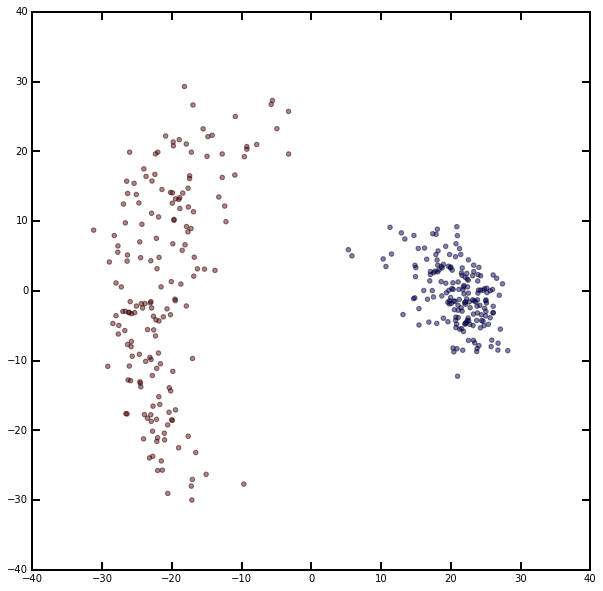

In [11]:
Z07 = pca.transform(X07)
x = Z07[:,0]
y = Z07[:,1]
colors = list(digits.target[liste_0]) + list(digits.target[liste_7])
#area = np.pi * (15 * np.random.rand(N))**2
plt.scatter(x, y, c=colors, alpha=0.5)

Not that bad ! Grâce à un simple changement de représentation, il est maintenant très facile de détecter automatiquement un 0 ou un 7 avec un algorithme de classification en deux dimensions comme une Analyse Discrimnante Linéaire (LDA in english). Si l'on regarde de plus près cette nouvelle représentation, voici à quoi ressemble le premier axe de cette représentation :

In [12]:
components = pca.components_
components[0].reshape((8,8))

array([[  4.58198802e-18,  -2.88858574e-03,  -2.64062064e-02,
         -2.15096073e-03,  -7.66125664e-02,  -1.92153137e-01,
         -1.10902067e-01,  -1.86905477e-02],
       [ -8.27180613e-25,  -3.37014447e-03,   5.11534725e-02,
          4.85909532e-02,   1.53334902e-02,  -2.89062750e-02,
         -9.20010269e-02,  -9.54656163e-03],
       [  0.00000000e+00,   7.12387065e-02,   2.38526318e-01,
          7.74152754e-02,  -1.21460006e-01,   1.94547728e-02,
          1.72424621e-02,  -1.95583768e-03],
       [  0.00000000e+00,   1.12035778e-01,   2.07529971e-01,
         -1.08813649e-01,  -2.89723962e-01,  -7.76212099e-02,
          2.83679236e-02,   0.00000000e+00],
       [  0.00000000e+00,   1.04250943e-01,   5.10475613e-02,
         -3.05446925e-01,  -3.43669184e-01,  -6.32799114e-02,
          6.52265090e-02,   0.00000000e+00],
       [  0.00000000e+00,   5.72762054e-02,   1.86820554e-01,
         -2.41749398e-01,  -2.14156453e-01,   1.77499070e-01,
          1.30484960e-01,   0.0

Avec une image c'est mieux :

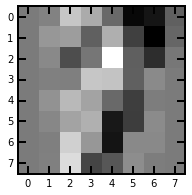

In [13]:
plt.figure(1, figsize=(3, 3))
plt.imshow(components[1].reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

 Bien sûr, les choses se compliquent avec les 10 chiffres...

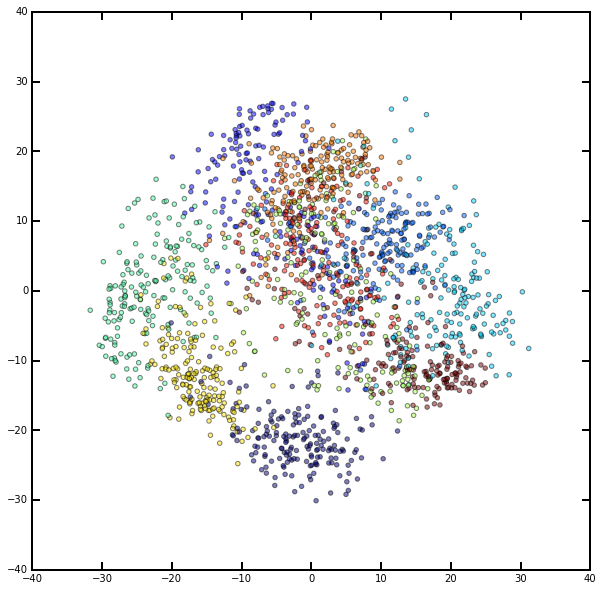

In [14]:
X = digits.data
pca = PCA(n_components=5)
pca.fit(X)
Z = pca.transform(X)
x = Z[:,0]
y = Z[:,1]
colors = digits.target
#area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# A vous de jouer !

On étudie 84 peintures de Rembrant et Van Gogh grâce à l'ACP. Pour cela on représente chaque image par son histogramme de couleurs. Dans le cas présent, cela consiste à partitioner l’espace des couleurs (ici, $[0,255]^3$)
en k parties égales et, pour chaque image I, calculer la proportion $p_{Ij}$ des pixels se trouvant dans la partie j, pour $j = 1, . . . , k$. Après avoir effectué cette étape, on associe à chaque image I le vecteur numérique de taille k contenant les proportions ($p_{I1},\ldots, p_{Ik}$).

##Echauffement
Les fichiers <a href="http://www.math.univ-angers.fr/~loustau/painting8.txt">painting8.txt</a> et <a href="http://www.math.univ-angers.fr/~loustau/painting64.txt">painting64.txt</a> contiennent l'histogramme des couleurs de chaque pour $k=8$ et $k=64$. Les 40 premières lignes correspondent aux tableaux de Rembrant et les 44 dernières à ceux de Van Gogh et les peintures se trouvent <a href = "http://www.math.univ-angers.fr/~loustau/painting.png"> ici </a>.

Faites une analyse en composantes principales pour séparer les peintures de Rembrant et Van Gogh.

In [15]:
#PCA for painting dataset
paint_data = np.genfromtxt("painting64.txt", delimiter=',')
print(paint_data.shape)

(84, 63)


[ 0.68327068  0.09517368  0.04907564]


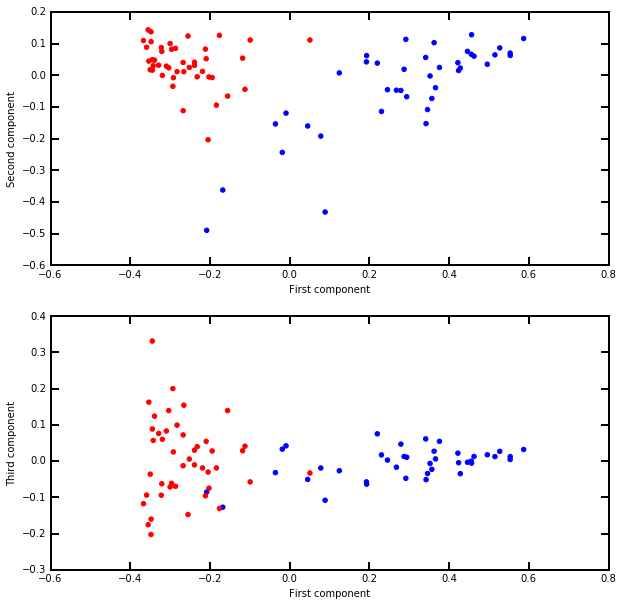

In [16]:
# PCA analyses
pca = PCA(n_components=3)
pca.fit(paint_data)
new_paint_data = pca.transform(paint_data)
x, y, z = new_paint_data[:,[0, 1, 2]].transpose()
print(pca.explained_variance_ratio_)

# plot
colors = 40*["blue"] + 44*["red"]
plt.subplot(211)
plt.scatter(x, y, color=colors)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.subplot(212)
plt.scatter(x, z, color=colors)
plt.xlabel("First component")
plt.ylabel("Third component")

Visualisation avec panda.

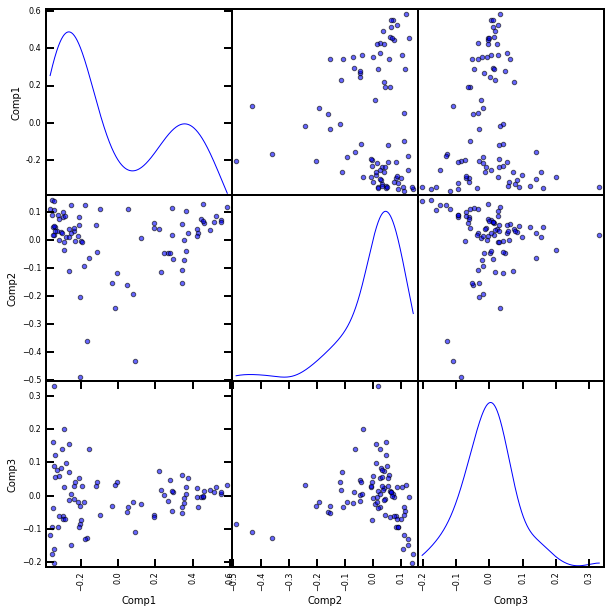

In [20]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

df = pd.DataFrame({"Comp1": x, "Comp2": y, "Comp3": z})
pltmat = scatter_matrix(df, alpha=.6, figsize=(10, 10), diagonal='kde', marker="o")